In [19]:
# Student Names
# Muscaan Balli - 23205368
# Rohit Sharma - 23200487
# Olumayokun Fadelu - 23201323
# Muhammad Usama Bhatti - 23202792
   
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv('WindFarm.csv')
df.head()

,Row Labels,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,...,Offshore,Roscommon,Sligo,Tipperary,Waterford,Wexford,Wicklow,Grand Total,Total,Number of windfarms installed
0,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.45,6.45,1
1,1997,NaN,NaN,NaN,NaN,39.78,NaN,NaN,NaN,NaN,...,NaN,5.00,NaN,NaN,NaN,NaN,NaN,50.78,57.23,3
2,1998,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,62.23,1
3,1999,NaN,NaN,NaN,4.62,NaN,NaN,3.33,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.95,70.18,2
4,2000,NaN,NaN,NaN,5.94,13.86,NaN,NaN,20.61,NaN,...,NaN,5.94,NaN,NaN,NaN,NaN,NaN,46.35,116.53,4


Time Series Analysis for Carlow County:
Mean Squared Error: 4.003985207366531
Root Mean Squared Error: 2.0009960538108342


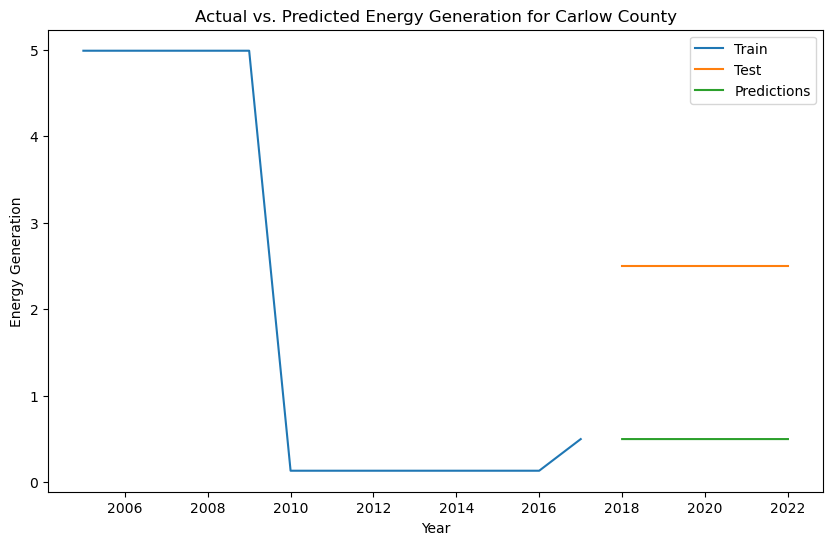

Time Series Analysis for Cavan County:
Mean Squared Error: 201.47024468159356
Root Mean Squared Error: 14.194021441494076


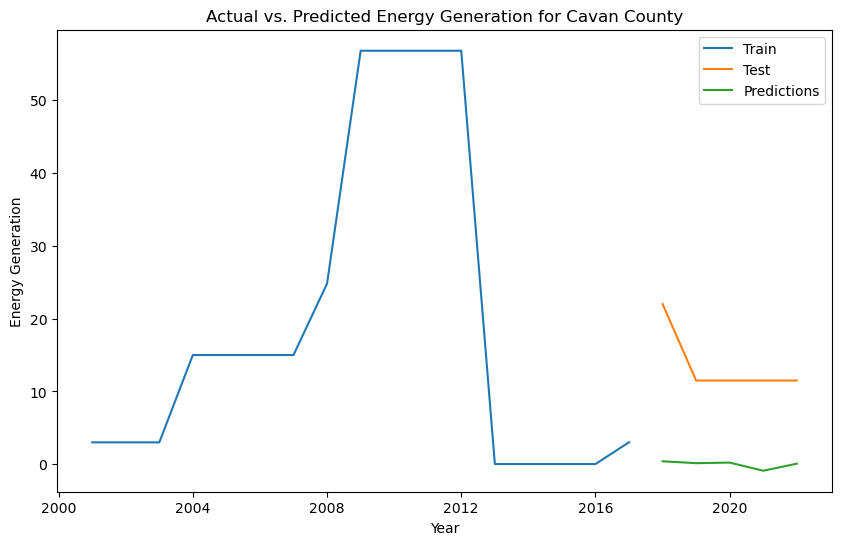

Time Series Analysis for Clare County:
Mean Squared Error: 824.1476625862476
Root Mean Squared Error: 28.70797210856677


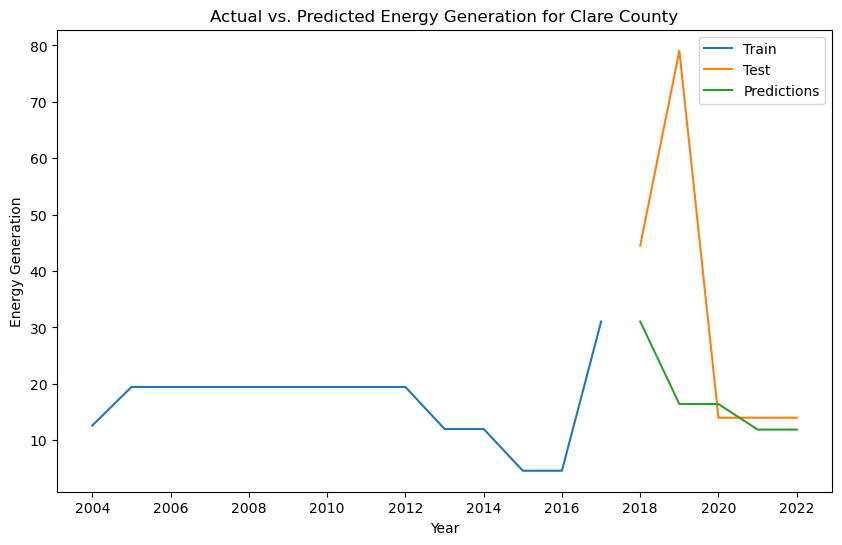

Time Series Analysis for Cork County:
Mean Squared Error: 251.30343169765501
Root Mean Squared Error: 15.85255284481509


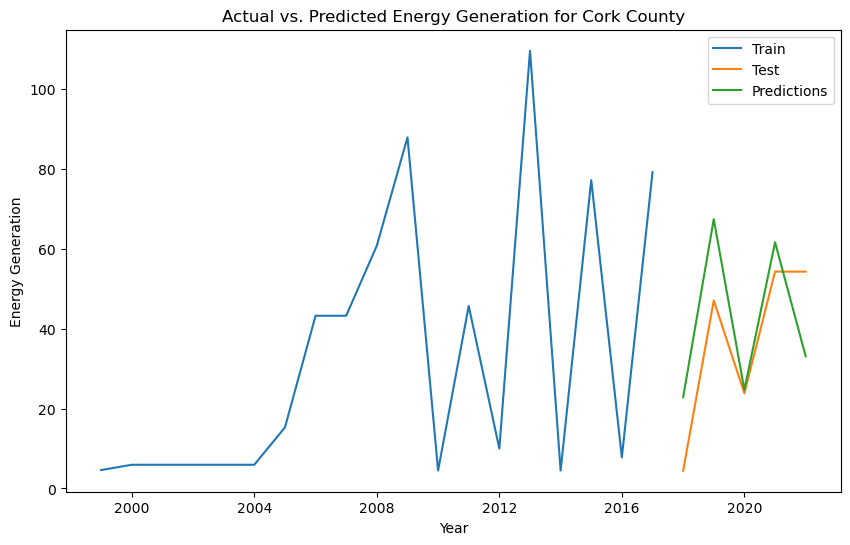

Time Series Analysis for Donegal County:
Mean Squared Error: 1905.574200913327
Root Mean Squared Error: 43.652883076760546


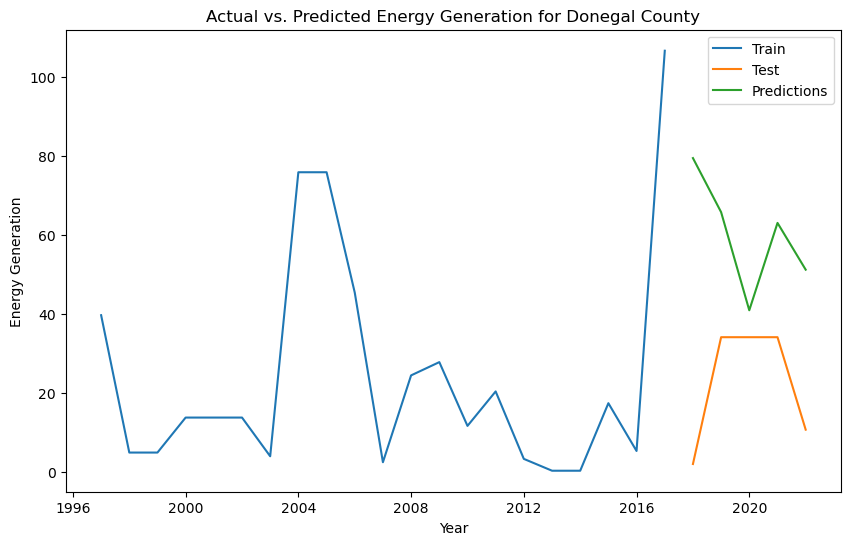

Time Series Analysis for Dublin County:
Mean Squared Error: 6.40000035794871e-12
Root Mean Squared Error: 2.529822198880528e-06


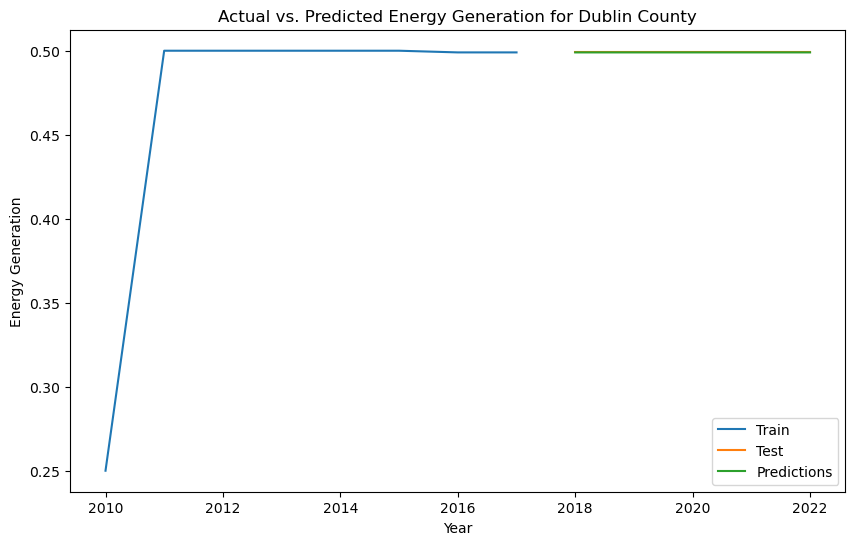

Time Series Analysis for Galway County:
Mean Squared Error: 13714.101362791145
Root Mean Squared Error: 117.10722165089199


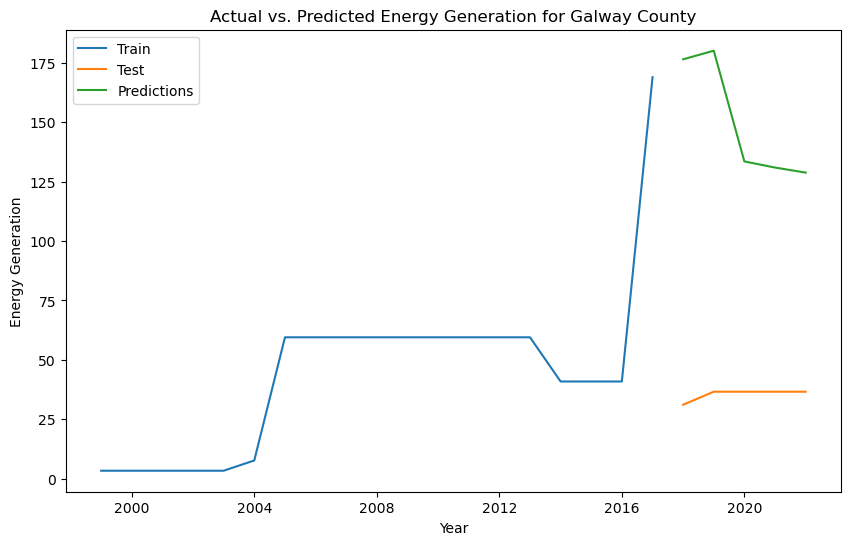

Time Series Analysis for Kerry County:
Mean Squared Error: 7422.403749748327
Root Mean Squared Error: 86.15337340898688


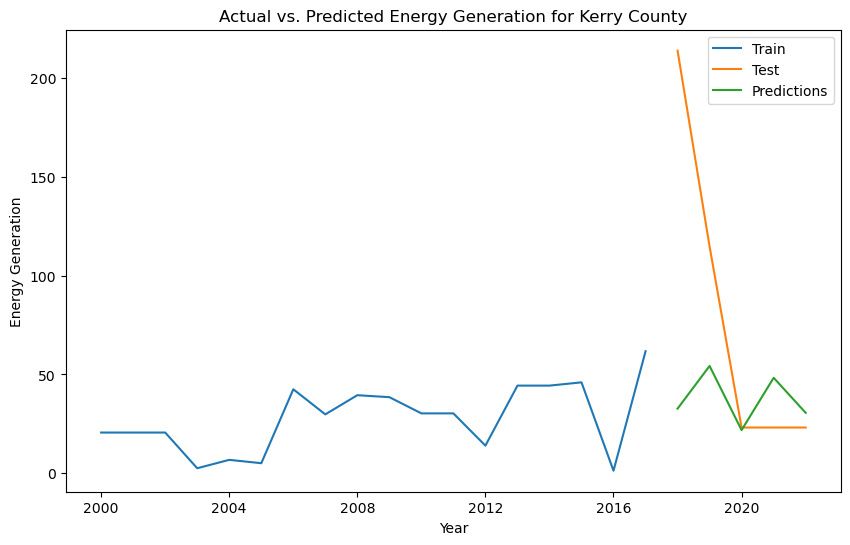

Time Series Analysis for Kildare County:
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


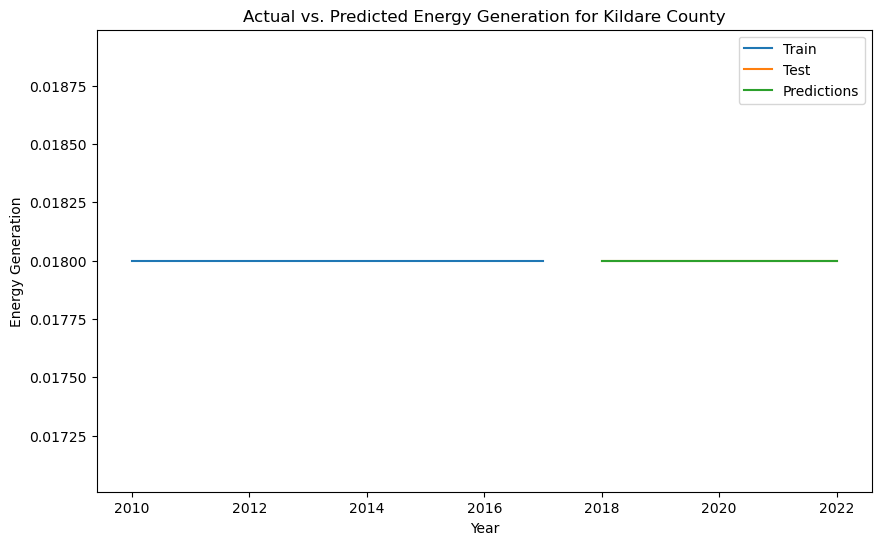

Time Series Analysis for Kilkenny County:
Mean Squared Error: 4.494858146784839e-11
Root Mean Squared Error: 6.704370325977555e-06


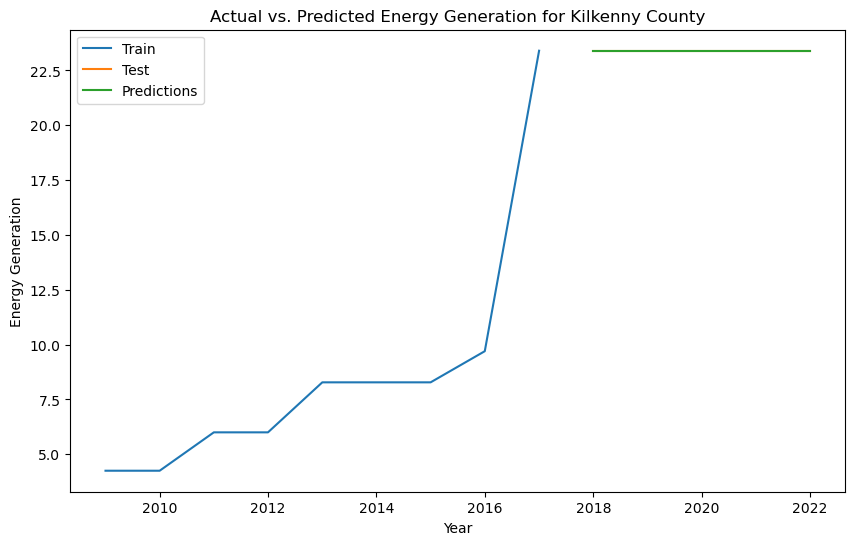

Time Series Analysis for Laois County:
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


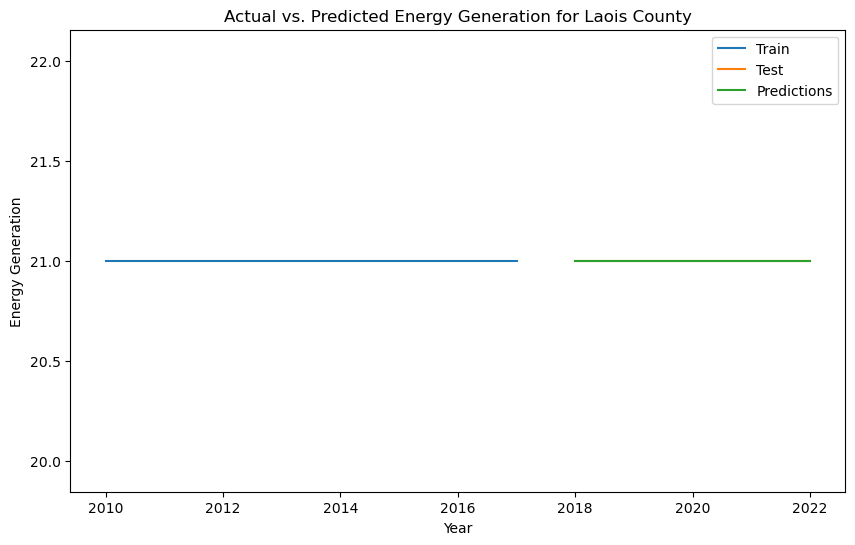

Time Series Analysis for Leitrim County:
Mean Squared Error: 17.31961745473445
Root Mean Squared Error: 4.161684449202564


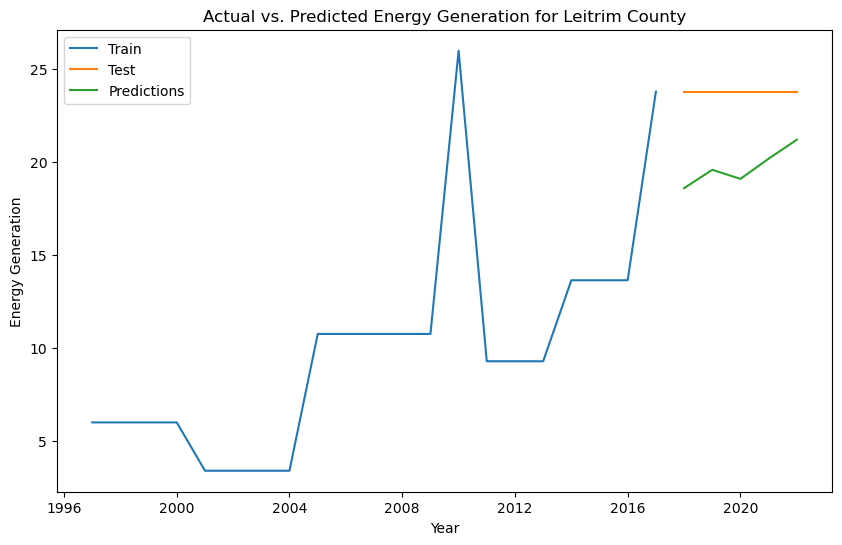

Time Series Analysis for Limerick County:
Mean Squared Error: 155.28991601292353
Root Mean Squared Error: 12.46153746585563


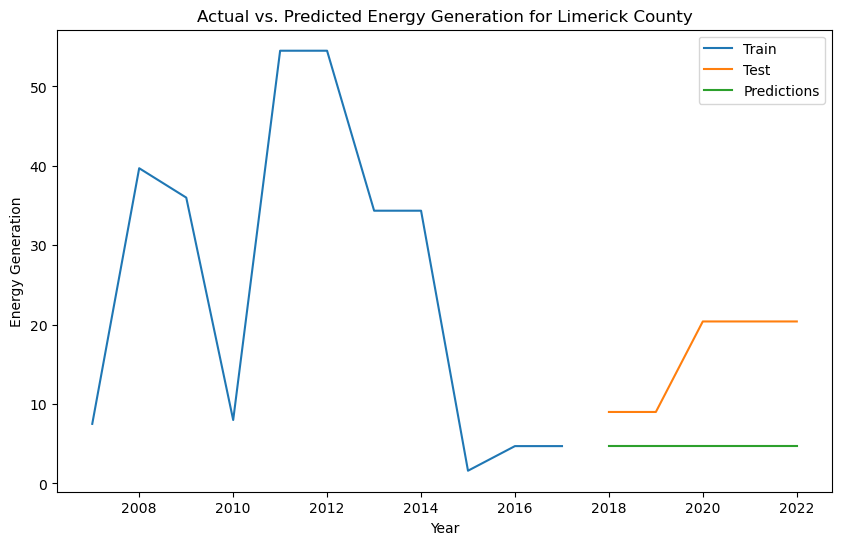

Time Series Analysis for Louth County:
Mean Squared Error: 3.182854588582647e-12
Root Mean Squared Error: 1.7840556573668455e-06


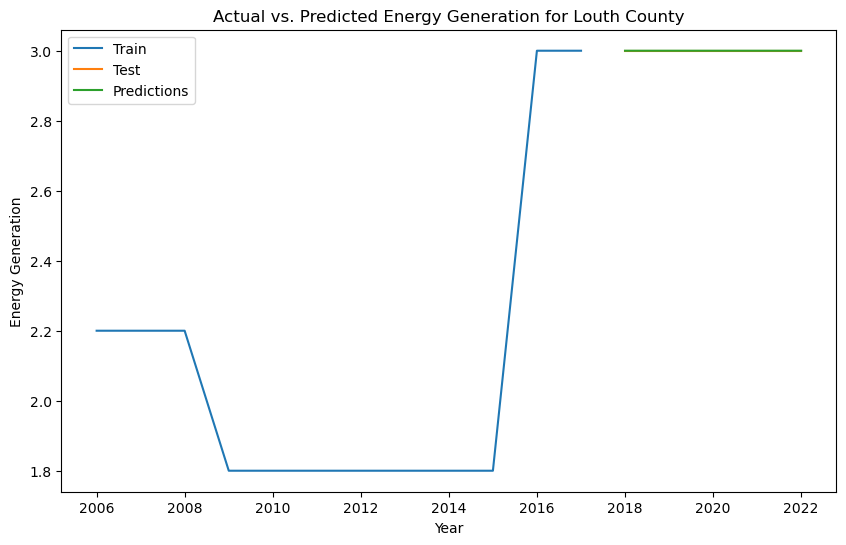

Time Series Analysis for Mayo County:
Mean Squared Error: 14433.837127394823
Root Mean Squared Error: 120.14090530454156


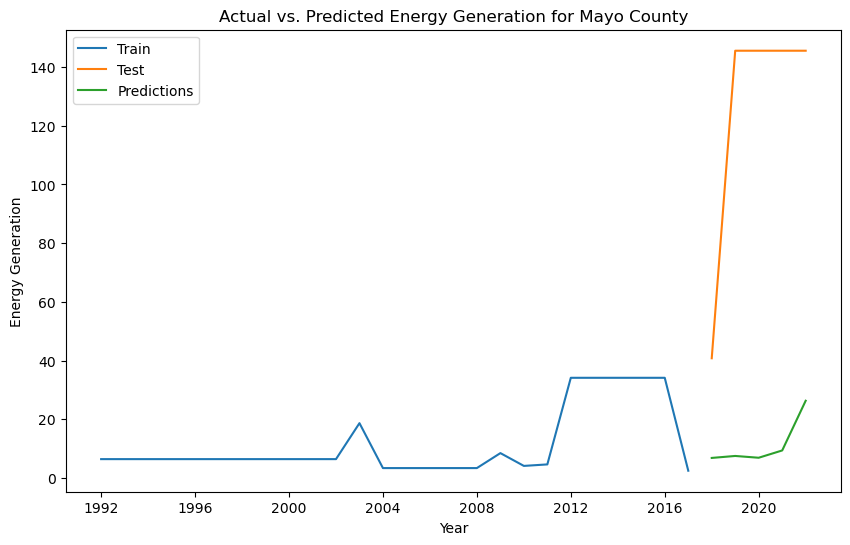

Time Series Analysis for Meath County:
Mean Squared Error: 19.516241763099735
Root Mean Squared Error: 4.4177190679240494


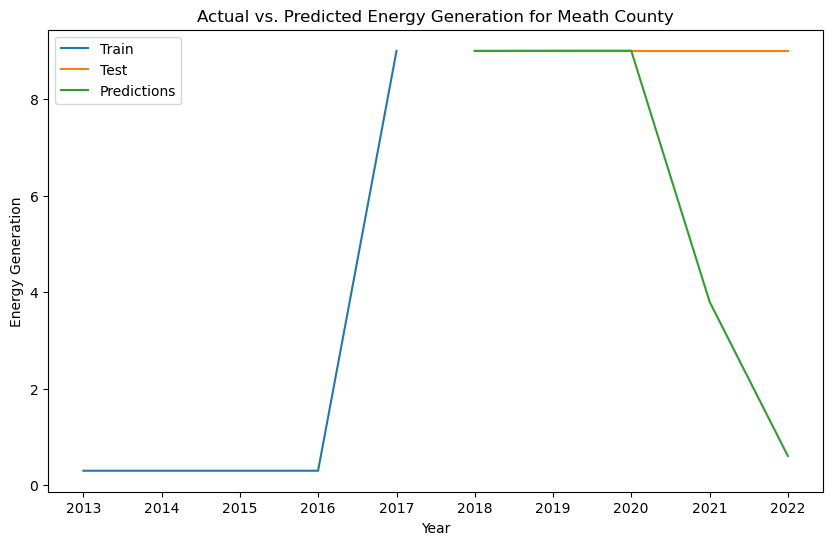

Time Series Analysis for Monaghan County:
Mean Squared Error: 144.99085907393135
Root Mean Squared Error: 12.041215016514379


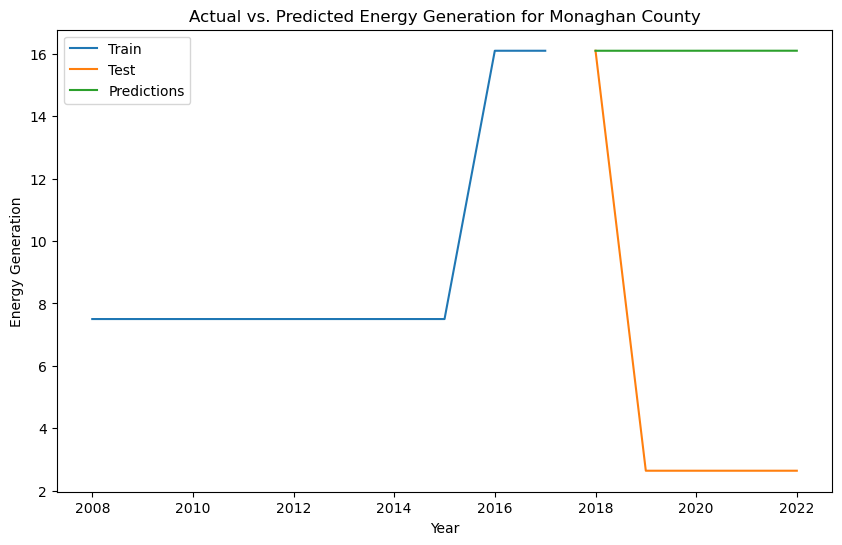

Time Series Analysis for Offaly County:
Mean Squared Error: 2736.5474291919163
Root Mean Squared Error: 52.31201993033643


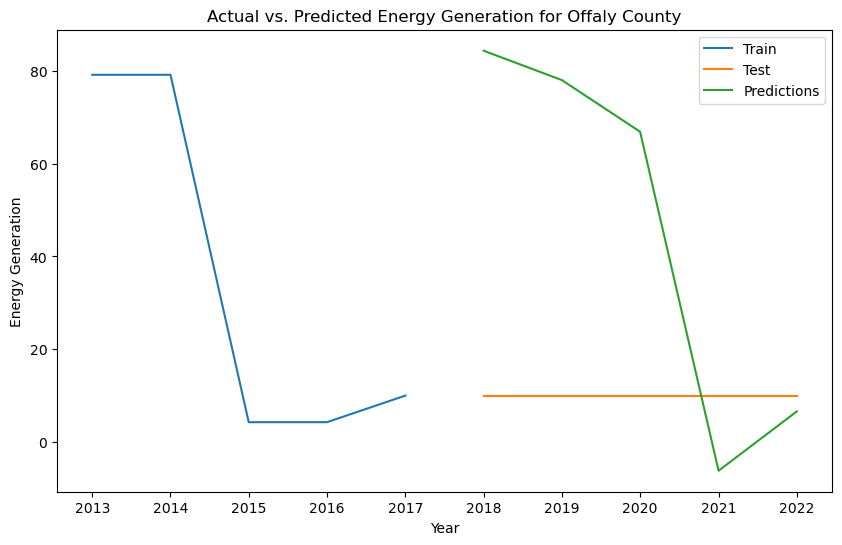

Time Series Analysis for Offshore County:
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


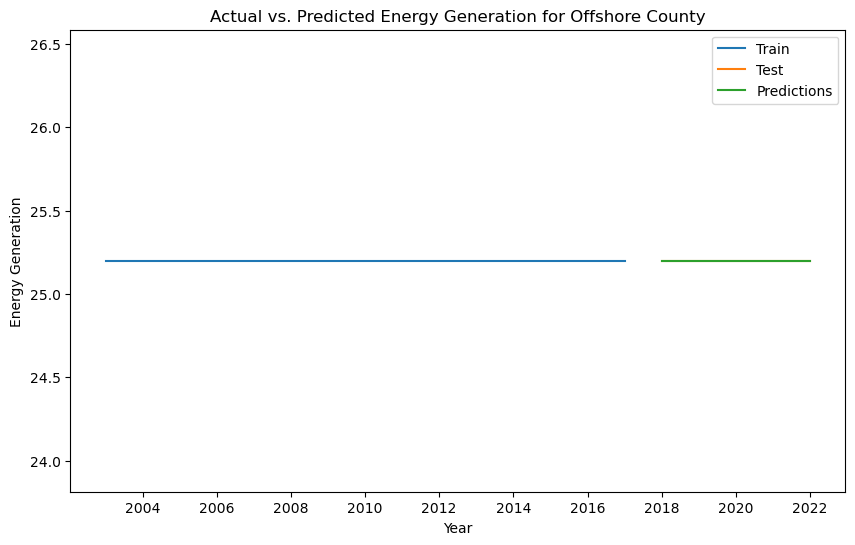

Time Series Analysis for Roscommon County:
Mean Squared Error: 171.58868267626377
Root Mean Squared Error: 13.099186336420432


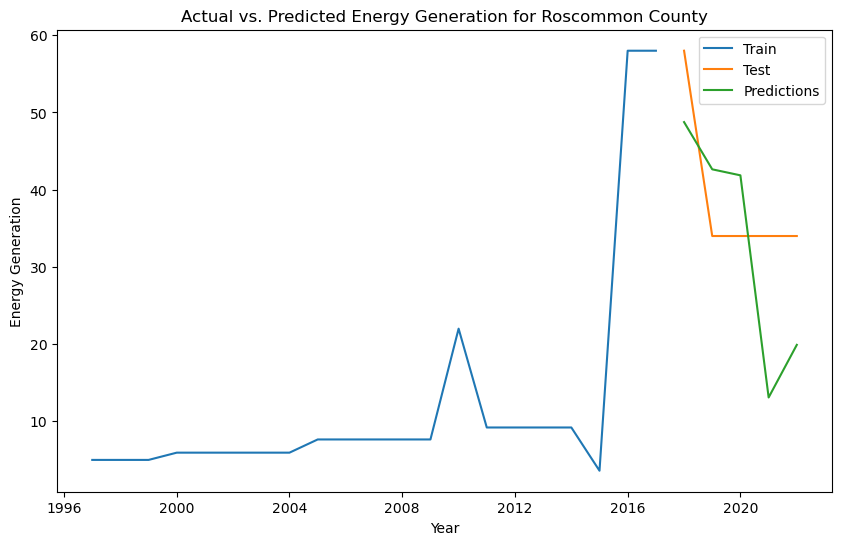

Time Series Analysis for Sligo County:
Mean Squared Error: 15.373499999999996
Root Mean Squared Error: 3.920905507660188


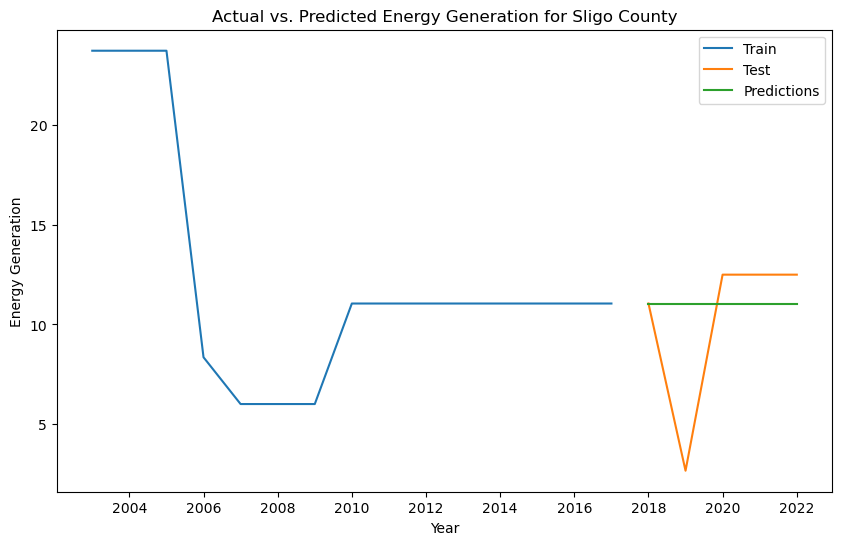

Time Series Analysis for Tipperary County:
Mean Squared Error: 3237.2932838124816
Root Mean Squared Error: 56.897216837139595


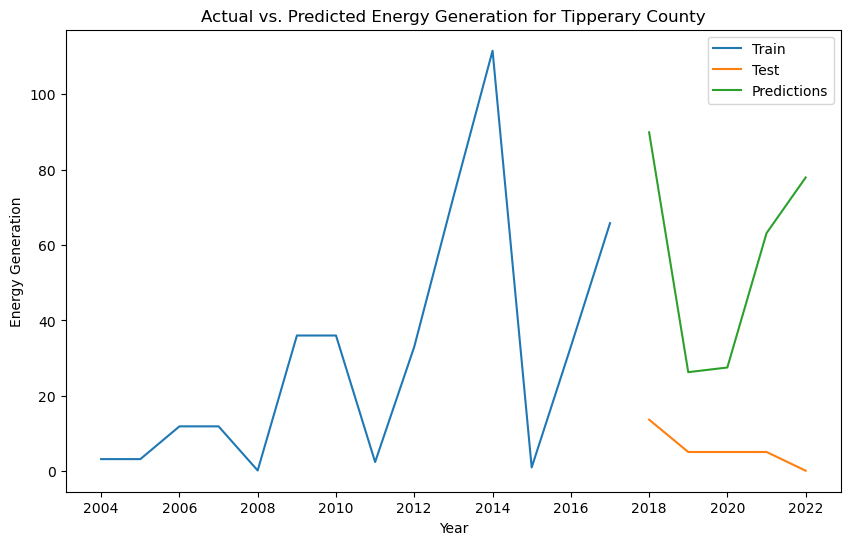

Time Series Analysis for Waterford County:
Mean Squared Error: 205.1827613880987
Root Mean Squared Error: 14.324201945940956


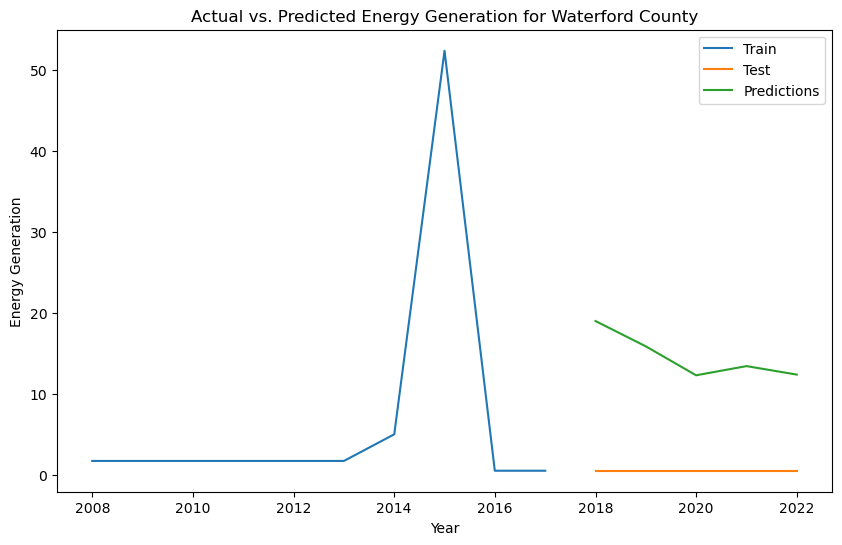

Time Series Analysis for Wexford County:
Mean Squared Error: 277.6588307650259
Root Mean Squared Error: 16.66309787419572


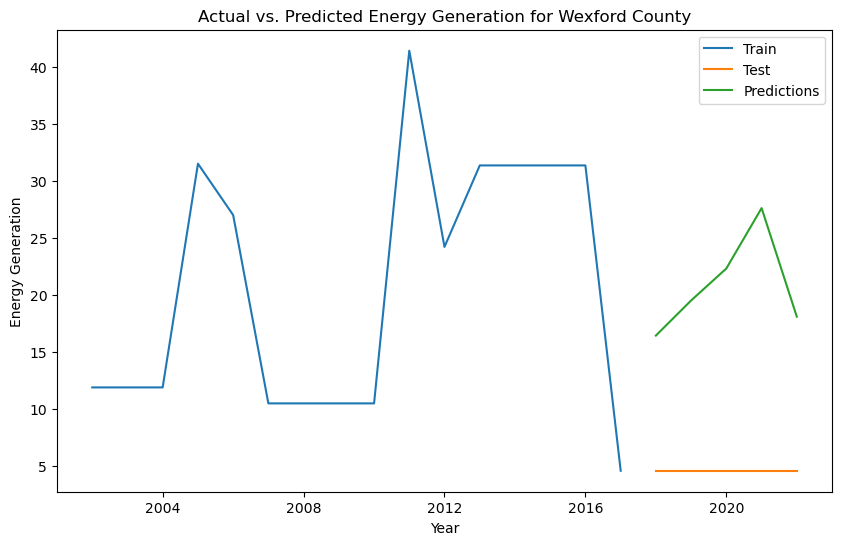

Time Series Analysis for Wicklow County:
Mean Squared Error: 273.0372508608526
Root Mean Squared Error: 16.523838865737364


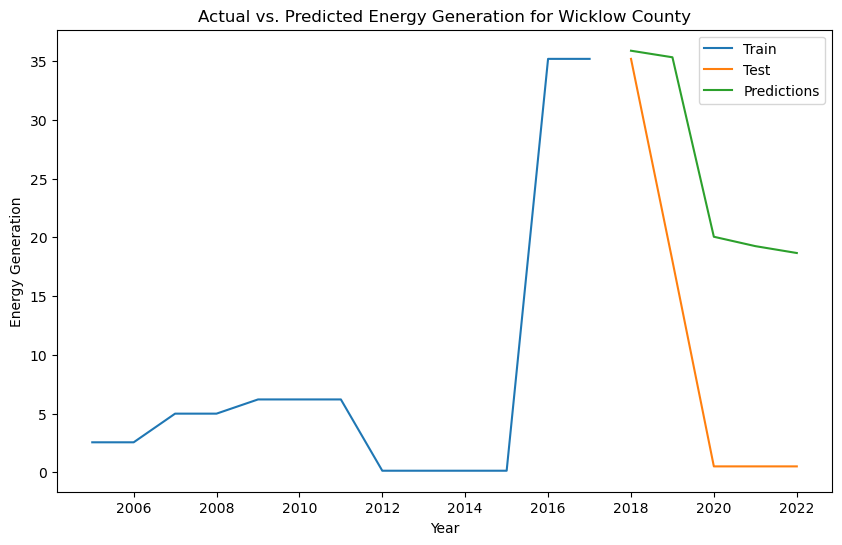

Time Series Analysis for Grand Total County:
Mean Squared Error: 96180.6995607134
Root Mean Squared Error: 310.1301332678161


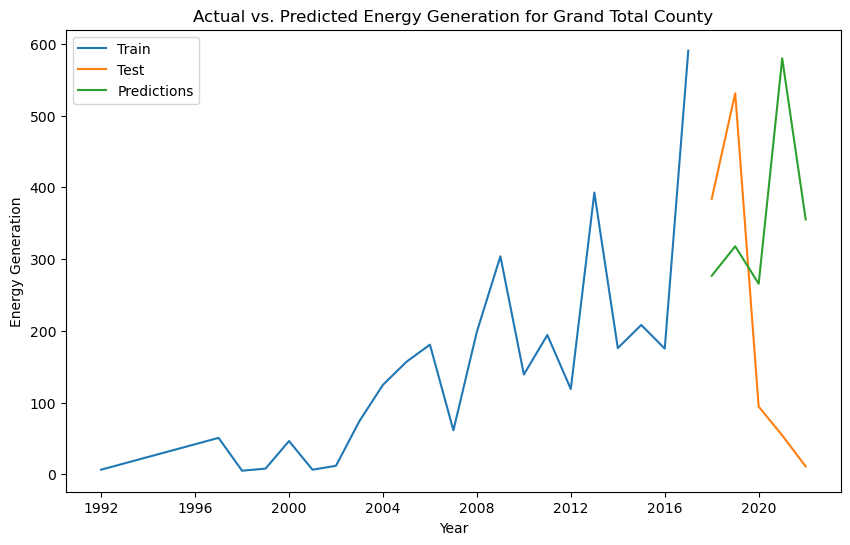

Time Series Analysis for Total County:
Mean Squared Error: 86156.14911171218
Root Mean Squared Error: 293.5236772591134


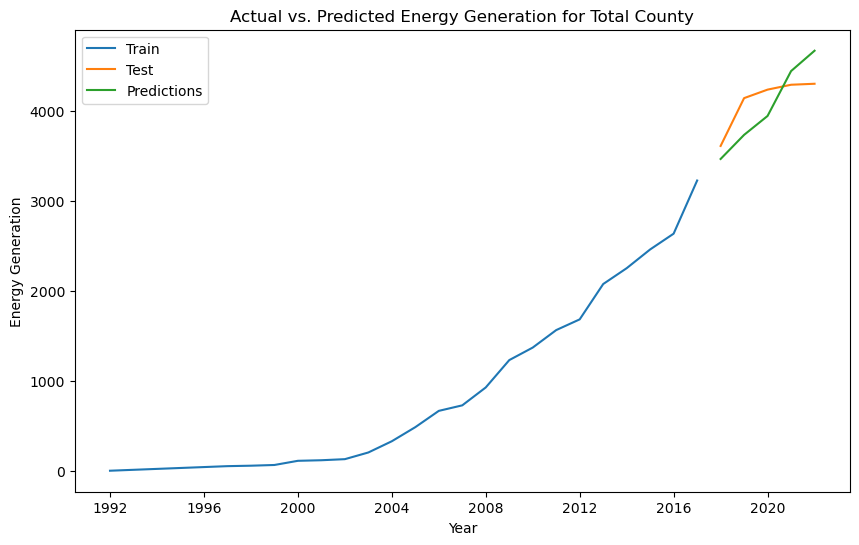

Time Series Analysis for Number of windfarms installed County:
Mean Squared Error: 58.50831508464719
Root Mean Squared Error: 7.649072825163007


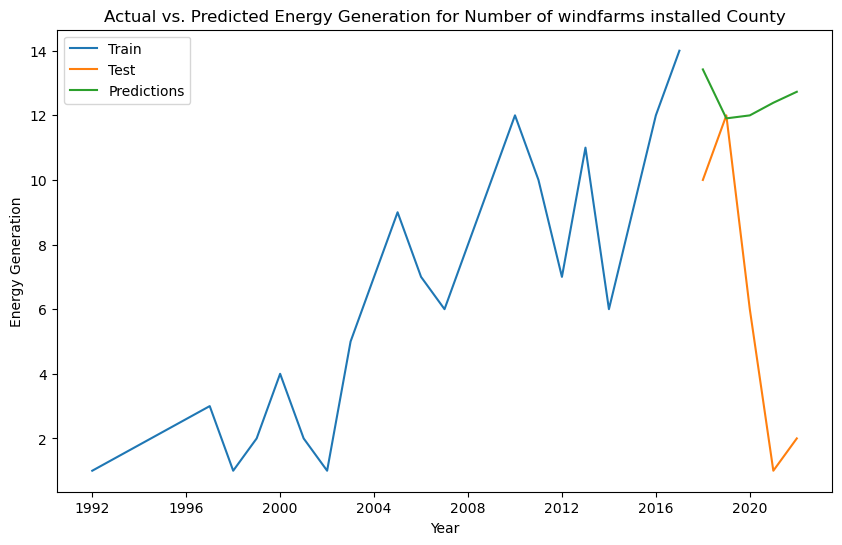

In [15]:
df.set_index('Row Labels', inplace=True)

# Drop 'Grand Total' row
#df.drop('Grand Total', inplace=True)

# Convert columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Forward fill missing values
df.fillna(method='ffill', inplace=True)

# Convert index to datetime
df.index = pd.to_datetime(df.index, format='%Y')

# Perform time series analysis for each county
for col in df.columns:
    print(f"Time Series Analysis for {col} County:")
    # Splitting the data into train and test sets
    train_data = df[col][:-5]  # Using all but the last 5 years as training data
    test_data = df[col][-5:]   # Using the last 5 years as test data
    
    # Define and fit the ARIMA model
    model = ARIMA(train_data, order=(5,1,0))
    results = model.fit()

    # Make predictions for the test data
    predictions = results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')

    # Calculate error metrics
    mse = mean_squared_error(test_data, predictions)
    rmse = np.sqrt(mse)

    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")

    # Visualize actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Train')
    plt.plot(test_data.index, test_data, label='Test')
    plt.plot(test_data.index, predictions, label='Predictions')
    plt.title(f'Actual vs. Predicted Energy Generation for {col} County')
    plt.xlabel('Year')
    plt.ylabel('Energy Generation')
    plt.legend()
    plt.show()

Mean Squared Error: 87483.83165113555
Root Mean Squared Error: 295.77665839470086


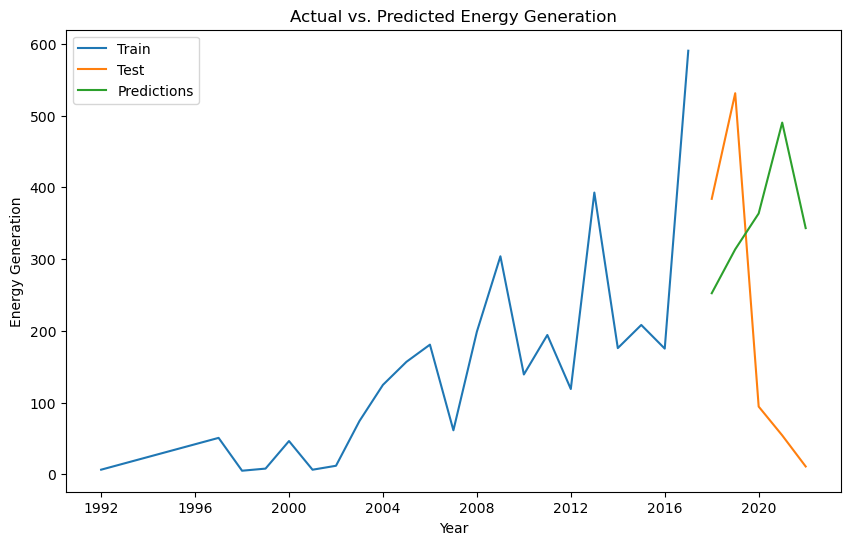

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


# Extract the energy generation data for analysis
energy_generation = df['Grand Total']

# Splitting the data into train and test sets
train_data = energy_generation[:-5]  # Using all but the last 5 years as training data
test_data = energy_generation[-5:]   # Using the last 5 years as test data

# Define and fit the SARIMA model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Make predictions for the test data
predictions = results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')

# Calculate error metrics
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.title('Actual vs. Predicted Energy Generation')
plt.xlabel('Year')
plt.ylabel('Energy Generation')
plt.legend()
plt.show()



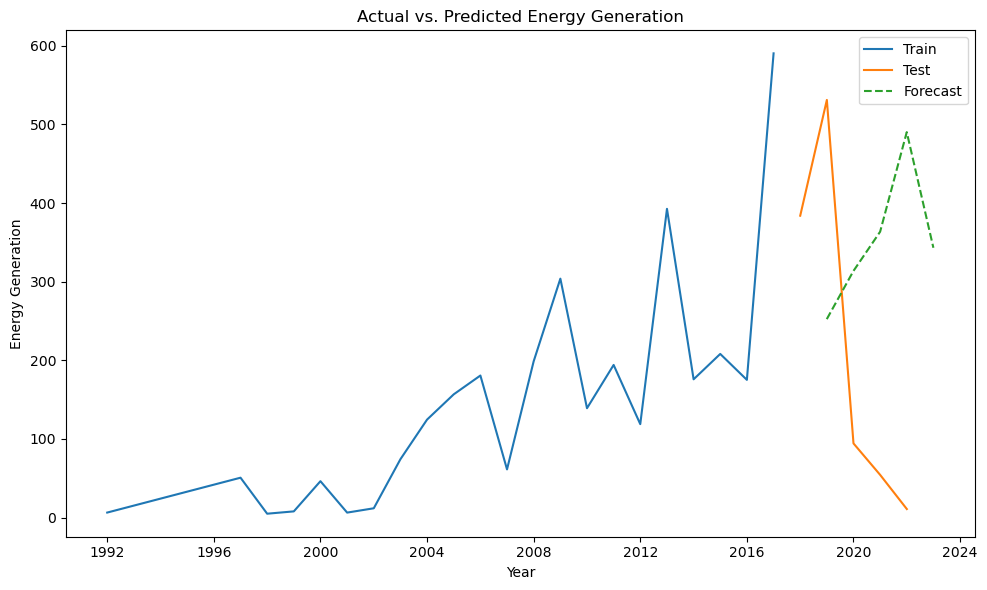

In [17]:
# Extend the time index to include future years
future_years = pd.date_range(start='2023-01-01', end='2030-01-01', freq='Y')

# Forecast energy generation for future years
forecast = results.forecast(steps=len(future_years))

# Create a DataFrame to store the forecasted values
forecast_df = pd.DataFrame(forecast, index=future_years, columns=['Energy Generation'])

# Visualize the forecasted values
# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(train_data.index, train_data, label='Train')

# Plot test data
plt.plot(test_data.index, test_data, label='Test')

# Plot forecasted values
forecast_index = pd.date_range(start=test_data.index[0], periods=len(predictions), freq='Y')
plt.plot(forecast_index, predictions, label='Forecast', linestyle='--')

plt.title('Actual vs. Predicted Energy Generation')
plt.xlabel('Year')
plt.ylabel('Energy Generation')
plt.legend()

plt.tight_layout()
plt.show()



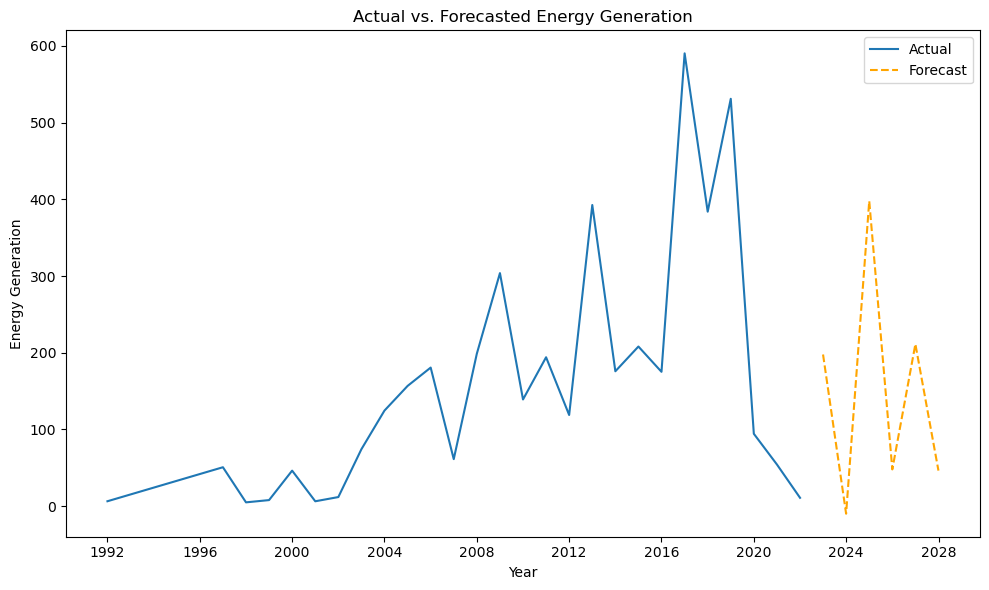

In [18]:
# Convert the last year in the dataset to a timestamp
last_year_timestamp = pd.Timestamp(df.index[-1])

# Define the number of years to forecast
num_years_forecast = 2028 - last_year_timestamp.year

# Define and fit the SARIMA model with the entire dataset
model = SARIMAX(energy_generation, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Make future predictions
forecast = results.forecast(steps=num_years_forecast)

# Create index for the forecasted years
forecast_index = pd.date_range(start=last_year_timestamp, periods=num_years_forecast, freq='Y')

# Visualize actual, predicted, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(energy_generation.index, energy_generation, label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='orange')
plt.title('Actual vs. Forecasted Energy Generation')
plt.xlabel('Year')
plt.ylabel('Energy Generation')
plt.legend()

plt.tight_layout()
plt.show()

